Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1085/1085 ━━━━━━━━━━━━━━━━━━━━ 55s 48ms/step - accuracy: 0.6459 - loss: 0.6014 - val_accuracy: 0.8225 - val_loss: 0.3776
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.8994 - loss: 0.2508 - val_accuracy: 0.8645 - val_loss: 0.3491
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.9696 - loss: 0.0828 - val_accuracy: 0.8640 - val_loss: 0.5010
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.8644 - val_loss: 0.6441
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9890 - loss: 0.0315 - val_accuracy: 0.8624 - val_loss: 0.7439
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9901 - loss: 0.0268 - val_accuracy: 0.8684 - val_loss: 0.8569
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.8605 - val_loss: 0.8909
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 47s 43ms/step - accuracy: 0.9910 - loss: 0.02

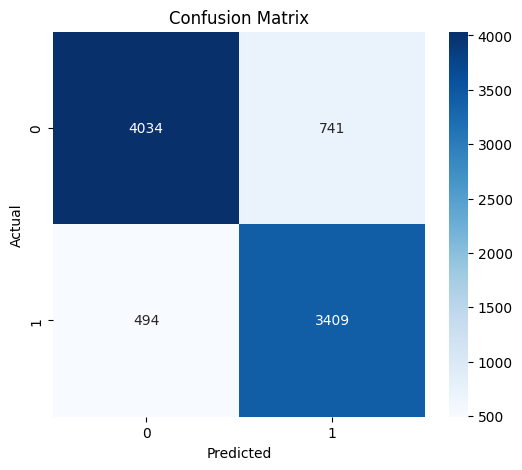

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Dataset
file_path = "/content/suspicious Bangla text.xlsx"
df = pd.read_excel(file_path)

# Extract text and labels
texts = df["Text"].astype(str).values
labels = df["binary_label"].values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Tokenization
max_words = 10000  # Max words to consider
max_len = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding="post", truncating="post")

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# FNN Model for Text Classification
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate model
y_pred_probs = model.predict(X_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save Model
model.save("fnn_text_classifier.h5")
